#Implement KMeans clustering from scratch

1. k-means clustering aims to partition observations into k clusters where each observation belongs to exactly one cluster.

2. It falls into category of unsupervised learning method.

3. Standard Algorithm of k-means starts by randomly initializing k centroids and then iteratively computing new centroids and then moving centroids to the center of the new formed clusters.
https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm_(naive_k-means)

4. Standard implementations can fail to converge if initialization is bad. Variants of the standard algorithm fix this issue by clever initialization techniques.

In [2]:
import numpy as np

In [45]:
class KMeansClustering:
    def __init__(self, X, n_clusters, max_iterations, tolerance):
        self.n_clusters = n_clusters
        self.tol = tolerance
        self.max_iterations = max_iterations
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        self.centroids = []
        self.initialize_centroids(X)

    def initialize_centroids(self, X):
        self.centroids = []
        for k in range(self.n_clusters):
            centroid = X[np.random.choice(range(self.n_samples))]
            self.centroids.append(centroid)

    def create_clusters(self, X, centroids):
        # intialize cluster list
        clusters = [[] for _ in range(self.n_clusters)]
        # compute clusters
        for idx, point in enumerate(X):
          ## ignored sqrt to improve speed
            closest_centroid = np.argmin(np.sum((point - centroids) ** 2, axis=1))
            clusters[closest_centroid].append(idx)
        return clusters

    def update_centroids(self, clusters, X):
        centroids = np.zeros((self.n_clusters, self.n_features))
        for idx, cluster in enumerate(clusters):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid
        return centroids

    def predict(self, centroids, X):
        y_pred = np.zeros(X.shape[0])
        clusters = self.create_clusters(X, centroids)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred

    def fit(self, X):
        self.initialize_centroids(X)

        for it in range(self.max_iterations):
            clusters = self.create_clusters(X, self.centroids)
            previous_centroids = self.centroids
            self.centroids = self.update_centroids(clusters, X)
            diff = abs(self.centroids - previous_centroids)
            diff_over_threshold = diff > self.tol
            if not diff_over_threshold.any():
                print("Converged!!!")
                break
            else:
                print(f"max diff: {np.amax(diff)}")

        # Get label predictions
        y_pred = self.predict(self.centroids, X)
        return y_pred

## Predict on Hand written digits data

In [3]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data)
data_std = sc.transform(data)

In [35]:
kmeans = KMeansClustering(data_std, n_clusters=n_digits, max_iterations=100)

In [36]:
y_pred = kmeans.fit(data_std)

max diff: 3.3625220244698797
max diff: 1.3159987016134556
max diff: 1.2273267096842158
max diff: 1.4440742521732646
max diff: 0.8572392971068377
max diff: 0.4498348828358454
max diff: 0.23296165696914806
max diff: 0.1377288848448266
max diff: 0.26674661225554364
max diff: 0.3442384074007262
max diff: 0.18809326394020642
max diff: 0.12490309540764288
max diff: 0.12341883615599578
max diff: 0.0803187735630449
max diff: 0.09425128116962356
max diff: 0.1827227682808808
max diff: 0.220851864809946
max diff: 0.08117176549114813
max diff: 0.052506107815889214
max diff: 0.03773223137071052
max diff: 0.042631652255554986
max diff: 0.03307209934370914
max diff: 0.042363743743456306
max diff: 0.05520143379679521
max diff: 0.0568549932719522
max diff: 0.16557286253965128
max diff: 0.15711433887202508
max diff: 0.1307250986157058
max diff: 0.10984999562136644
max diff: 0.069222128893494
max diff: 0.21890355960887217
max diff: 0.03298670567682027
max diff: 0.018306910324953796
max diff: 0.0439611272

## Plot data along first 2 PCA components. (also refits data on reduced pca data)

max diff: 9.522994808074142
max diff: 3.0896775761229325
max diff: 2.0076457200147484
max diff: 1.784984715700869
max diff: 2.0913159881587395
max diff: 2.3840982560776123
max diff: 2.079493326880473
max diff: 0.8863496852658791
max diff: 0.6522578983090562
max diff: 0.5631403335070517
max diff: 0.5772880695989204
max diff: 0.7755209504796241
max diff: 0.6467716671152335
max diff: 0.5994912717675103
max diff: 0.5334721998292977
max diff: 0.5002634902728929
max diff: 0.3949392235498883
max diff: 0.4540531620998167
max diff: 0.561801370858479
max diff: 0.45437709939761817


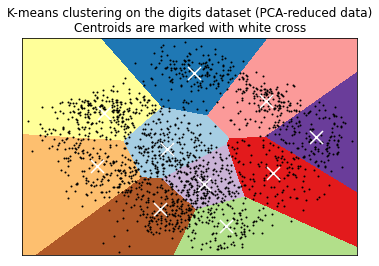

In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeansClustering(reduced_data, n_clusters=n_digits, max_iterations=20, tolerance=1e-4)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
kmeans.fit(reduced_data)
Z = kmeans.predict(kmeans.centroids, np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.centroids
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [47]:
y_pred = kmeans.predict(kmeans.centroids, reduced_data)